# Machine Learning with Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use("ggplot")
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# column names for the dataset
names = ["party", "infants", "water", "budget", "physician", "salvador", "religious", "satellite", "aid", "missile", 
         "immigration", "synfuels", "education", "superfund", "crime", "duty_free_exports", "eaa_rsa"]

In [3]:
# load the data
df_voting = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=names)

In [4]:
# check the dataframe
df_voting.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Exploratory Data Analysis

### Numerical EDA

In [5]:
# check the shape of dataframe
df_voting.shape

(435, 17)

In [6]:
# check basic information about the dataframe
df_voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [7]:
# replace 'n' with 0, 'y' with 1 and '?' with nan
df = df_voting.replace("n", 0)
df.replace("y", 1, inplace=True)
df.replace("?", np.nan, inplace=True)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [8]:
# implute most common value to NaN
df = df.fillna(df.mode().iloc[0])

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [9]:
# cast all float values to int
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


### Visual EDA

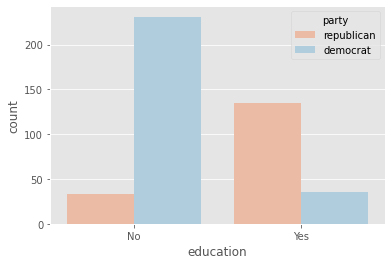

In [10]:
# countplot of the education bill
plt.figure()
sns.countplot(x="education", hue="party", data=df, palette="RdBu")
plt.xticks([0, 1], ["No", "Yes"]);

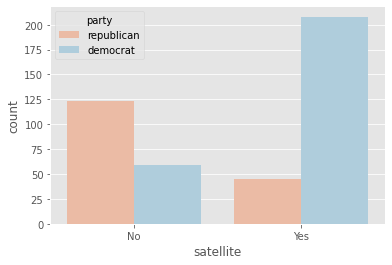

In [11]:
# countplot of the satellite bill
plt.figure()
sns.countplot(x="satellite", hue="party", data=df, palette="RdBu")
plt.xticks([0, 1], ["No", "Yes"]);

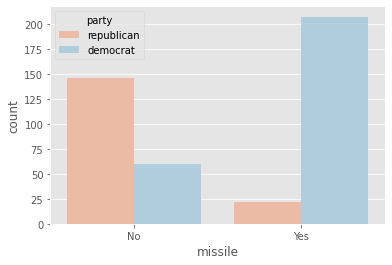

In [12]:
# countplot of the missile bill
plt.figure()
sns.countplot(x="missile", hue="party", data=df, palette="RdBu")
plt.xticks([0, 1], ["No", "Yes"]);

## The Classifier Challenge

### k-Nearest Neighbors: Fit

In [13]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn_vote = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn_vote.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

In [14]:
X_new = np.array([0.696469, 0.286139, 0.226851, 0.551315, 0.719469, 0.423106, 0.980764, 0.68483, 0.480932, 0.392118, 0.343178, 0.72905, 0.438572, 0.059678, 0.398044, 0.737995])
X_new = X_new.reshape(1, 16)

In [15]:
# Predict the labels for the training data X
y_pred = knn_vote.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn_vote.predict(X_new)
print(f"Prediction: {new_prediction}")

Prediction: ['democrat']


## Measuring Model Performance

### The Digits Recognition Dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

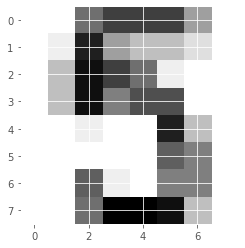

In [16]:
# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest');

### Train/Test Split + Fit/Predict/Accuracy

In [17]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn_digit = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn_digit.fit(X_train, y_train)

# Print the accuracy
print(f"Accuracy Score: {knn_digit.score(X_test, y_test):.3f}")

Accuracy Score: 0.983


### Overfitting and Underfitting

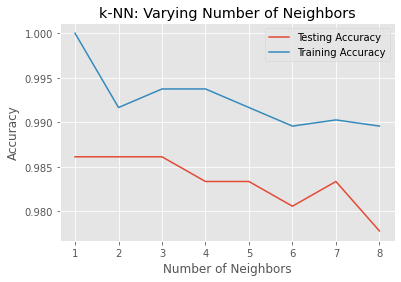

In [18]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_digit = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_digit.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_digit.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn_digit.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

## Introduction to Regression

### Importing Data for Supervised Learning

In [19]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df_gapminder = pd.read_csv("./data/gm_2008_region.csv")

# Create arrays for features and target variable
y = df_gapminder["life"].values
X = df_gapminder["fertility"].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


### Exploring the Gapminder Data

In [20]:
# Check the dataframe
df_gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [21]:
# Check information
df_gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [22]:
# Check description
df_gapminder.describe().T

,count,mean,std,min,25%,50%,75%,max
population,139.0,3.549977e+07,1.095121e+08,277315.000000,3.752776e+06,9.705130e+06,2.791973e+07,1.197070e+09
fertility,139.0,3.005108e+00,1.615354e+00,1.280000,1.810000e+00,2.410000e+00,4.095000e+00,7.590000e+00
HIV,139.0,1.915612e+00,4.408974e+00,0.060000,1.000000e-01,4.000000e-01,1.300000e+00,2.590000e+01
CO2,139.0,4.459874e+00,6.268349e+00,0.008618,4.961900e-01,2.223796e+00,6.589156e+00,4.870206e+01
BMI_male,139.0,2.462305e+01,2.209368e+00,20.397420,2.244814e+01,2.515699e+01,2.649757e+01,2.845698e+01
GDP,139.0,1.663878e+04,1.920730e+04,588.000000,2.899000e+03,9.938000e+03,2.327850e+04,1.260760e+05
BMI_female,139.0,1.267019e+02,4.471997e+00,117.375500,1.232322e+02,1.265196e+02,1.302759e+02,1.354920e+02
life,139.0,6.960288e+01,9.122189e+00,45.200000,6.220000e+01,7.200000e+01,7.685000e+01,8.260000e+01
child_mortality,139.0,4.509712e+01,4.572467e+01,2.700000,8.100000e+00,2.400000e+01,7.420000e+01,1.920000e+02


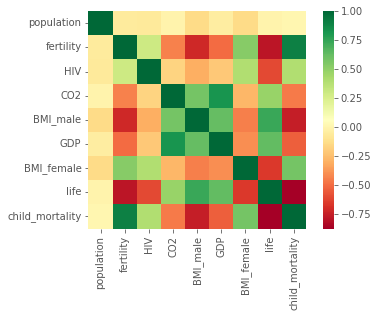

In [23]:
# Plot the correlation heatmap
sns.heatmap(df_gapminder.corr(), square=True, cmap='RdYlGn');

## The Basics of Linear Regression

### Fit & Predict for Regression

R square score: 0.6192442167740035


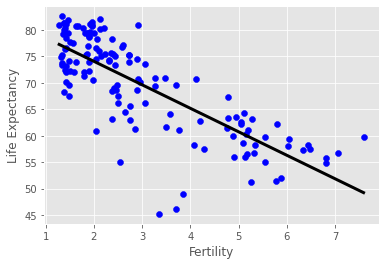

In [24]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_reshaped, y_reshaped)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(f"R square score: {reg.score(X_reshaped, y_reshaped)}")

# Plot data
plt.scatter(X_reshaped, y_reshaped, color="blue")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3);

### Train/Test Split for Regression

In [25]:
# Import necessary modules
from sklearn.metrics import mean_squared_error

# Create training and test sets
X = df_gapminder.drop(["life", "Region"], axis=1).values
y = df_gapminder["life"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print(f"R^2: {reg_all.score(X_test, y_test):.3f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.3f}")

R^2: 0.838
Root Mean Squared Error: 3.248


## Cross-Validation

### 5-Fold Cross-Validation

In [26]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(f"Cross-validation 5-Fold CV scores: {cv_scores}")

print(f"Average 5-Fold CV Score: {np.mean(cv_scores):.3f}")

Cross-validation 5-Fold CV scores: [0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.860


### K-Fold CV Comparison

In [27]:
# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(f"Cross-validation 3-Fold CV scores: {np.mean(cvscores_3):.3f}")

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(f"Cross-validation 10-Fold CV scores: {np.mean(cvscores_10):.3f}")

Cross-validation 3-Fold CV scores: 0.872
Cross-validation 10-Fold CV scores: 0.844


## Regularized Regression

### Regularization I: LAsso

Lasso Regularization Coefficient: [-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


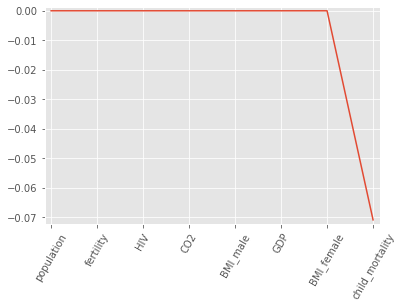

In [28]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(f"Lasso Regularization Coefficient: {lasso_coef}")

# Plot the coefficients
plt.plot(range(len(df_gapminder.drop(["life", "Region"], axis=1).columns)), lasso_coef)
plt.xticks(range(len(df_gapminder.drop(["life", "Region"], axis=1).columns)), df_gapminder.drop(["life", "Region"], axis=1).columns.values, rotation=60)
plt.margins(0.02);

### Regularization II: Ridge

In [29]:
def display_plot(cv_scores, cv_scores_std):
    """
    Plots the R_square score as well as standard error for different alphas.
    
    Parameters
    ----------
    cv_scores : float
      Cross-validation scores for the different models.
    cv_scores_std : float
      Standard error of the cross-validation scores.
    """
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log');

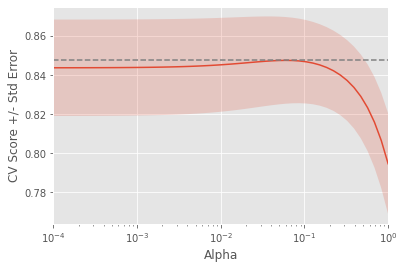

In [30]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## How Good is your Model?

### Metrics for Classification

In [31]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# data
data = pd.read_csv("data/diabetes.csv")
X = data.drop(["diabetes"], axis=1).values
y = data["diabetes"].values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Confusion Matrix: 
[[176  30]
 [ 56  46]]
Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic Regression and the ROC Curve

### Building a Logistic Regression Model

In [32]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Confusion Matrix: 
[[170  36]
 [ 36  66]]
Classification Report 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



### Plotting an ROC Curve

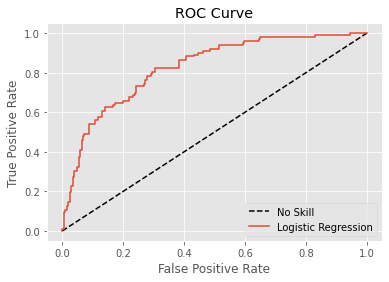

In [33]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

### Precision-Recall Curve

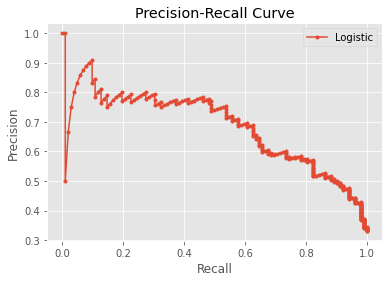

In [34]:
# Import necessary modules
from sklearn.metrics import precision_recall_curve

# predict class values
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)

# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall Curve")
plt.legend();

## Area Under the ROC Curve

### AUC Computation

In [35]:
# Import necessary modules
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print(f"AUC: {roc_auc_score(y_test, y_pred_prob):.3f}")

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring="roc_auc")

# Print list of AUC scores
print(f"AUC scores computed using 5-fold cross-validation: {cv_auc}")

AUC: 0.826
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.8745283  0.83245283]


## Hyperparameter Tuning

### Hyperparameter Tuning with GridSearchCV

In [36]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}") 
print(f"Best score is {logreg_cv.best_score_:.3f}")

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.776


### Hyperparameter Tuning with RandomizedSearchCV

In [37]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_:.3f}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.744


## Hold-Out Set for Final Evaluation

### Hold-Out Set in Practice I: Classification

In [38]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print(f"Tuned Logistic Regression Parameter: {logreg_cv.best_params_}")
print(f"Tuned Logistic Regression Accuracy: {logreg_cv.best_score_:.3f}")

Tuned Logistic Regression Parameter: {'C': 2275.845926074791, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.776


### Hold-Out Set in Practice II: Regression

In [39]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create train and test sets
X = df_gapminder.drop(["life", "Region"], axis=1).values
y = df_gapminder["life"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {"l1_ratio": l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Tuned ElasticNet l1 ratio: {format(gm_cv.best_params_)}")
print(f"Tuned ElasticNet R squared: {r2:.3f}")
print(f"Tuned ElasticNet MSE: {mse:.3f}")

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.867
Tuned ElasticNet MSE: 10.058


## Preprocessing Data

### Exploring Categorical Features

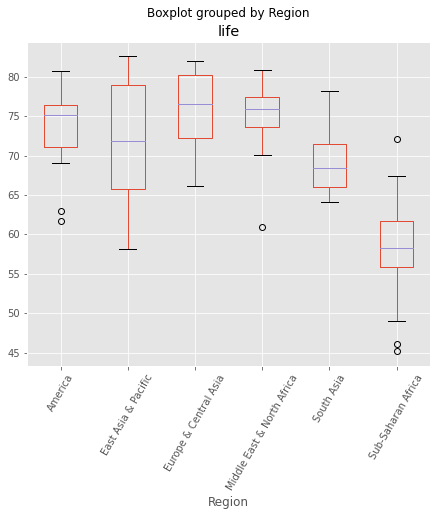

In [40]:
# Create a boxplot of life expectancy per region
df_gapminder.boxplot("life", "Region", rot=60, figsize=(7, 6));

### Creating Dummy Variables

In [41]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df_gapminder)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df_gapminder, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


### Regression with Categorical Features

In [42]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
X = df_region.drop(["life"], axis=1)
y = df_region["life"]
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## Handling Missing Data

### Dropping Missing Data

In [51]:
# Convert '?' to NaN
df_voting[df_voting == "?"] = np.nan
df_voting[df_voting == "n"] = 0
df_voting[df_voting == "y"] = 1

# Print the number of NaNs
print(df_voting.isnull().sum())

# Print shape of original DataFrame
print(f"Shape of Original DataFrame: {df_voting.shape}")

# Drop missing values and print shape of new DataFrame
df_clean = df_voting.dropna()

# Print shape of new DataFrame
print(f"Shape of DataFrame After Dropping All Rows with Missing Values: {df_clean.shape}")

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


### Imputing Missing Data in a ML Pipeline I

In [52]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = SimpleImputer(strategy="most_frequent")

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
         ('SVM', clf)]

### Imputing Missing Data in a ML Pipeline II

In [53]:
# Import necessary modules
from sklearn.pipeline import Pipeline

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
y = df_voting['party'].values
X = df_voting.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



## Centering and Scaling

### Centering and Scaling your Data